# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [58]:
#Dependencies
import requests
import json
from api_keys import api_key
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pprint import pprint
import random
from citipy import citipy


In [59]:
#Urls and API Keys
url = "http://api.openweathermap.org/data/2.5/weather?"
#query_url = f"{url}appid={api_key}&units={units}&q="
#query_url = url + "appid=" + api_key + "&q={name}"
query_url = url + "appid=" + api_key + "&q=houston" + "&units=imperial"

In [60]:
weather_response = requests.get(query_url)
weather_json = weather_response.json()
    
#print(query_url)
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 29.76, 'lon': -95.36},
 'dt': 1599840116,
 'id': 4699066,
 'main': {'feels_like': 85.12,
          'humidity': 78,
          'pressure': 1018,
          'temp': 78.96,
          'temp_max': 81,
          'temp_min': 77},
 'name': 'Houston',
 'sys': {'country': 'US',
         'id': 2006306,
         'sunrise': 1599825862,
         'sunset': 1599870701,
         'type': 3},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 15, 'gust': 11.99, 'speed': 4}}


## Generate Cities List

In [61]:
#generating coordinates
coordinates = [(random.random()*70.0, random.random()*70.0) for _ in range(10)]
#coord_df = pd.DataFrame(coordinates)
#coordinates_df= coord_df.rename(columns={"0":"Latitude", "1":"Longitude"})
#coordinates_df
print(coordinates)

[(5.717182034340508, 47.978090063761286), (7.58534105995777, 59.375520174063354), (19.03280011152651, 5.174544965743106), (6.7050880253745335, 8.988764714764134), (42.519375139866696, 7.657235521604612), (16.166231495671564, 0.708430753713748), (47.50014239736558, 65.02467624468014), (51.02290179177605, 28.724120948257703), (42.76896836695832, 65.70249876053192), (3.6343414648157504, 18.378327425207253)]


In [74]:
cities = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon).city_name)
print(cities)


['hobyo', 'bandarbeyla', 'arlit', 'otukpo', 'antibes', 'gao', 'dzhusaly', 'chopovychi', 'shieli', 'mongoumba']


In [71]:
#All individual variables are reading the json response ap
#pressure = []
#lon = []
#lat = []
#cloud = []
#wind = []
#temp = []

#for city in cities:
    #response = requests.get(query_url + city).json()
response = weather_json
temp = response['main']['temp']
humidity = response['main']['humidity']
cloud = response['clouds']['all']
wind = response['wind']['speed']
print(cloud)
    #country_code = city.country_code
    #name = city.city_name
    #lon = lon.append(response['coord']['lon'])
    #lat = lat.append(response['coord']['lat'])
    #humidity = pressure.append(response['main']['humidity'])
    #cloud = cloudiness.append(response['clouds']['all'])
    
    #print(f"The country code of {name} is '{country_code}'.")

1


In [115]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + api_key +  "&units=imperial" +"&q="
lon = []
lat = []
cloud = []
wind = []
temp = []
humidity =[]
max_temp = []
country = []
date = []
name = []
count_sets = 1
cities_count = 0
for city in cities:
    #country_code = city.country_code
   
        
    #count_sets = (count_sets(cities_counts = 50)+1)
    request_url = query_url + city
    #print(cities_count)
   
    try:
        response = requests.get(request_url).json()
        if cities_count <= 50:
            cities_count = cities_count + 1
        else: 
            cities_count = 0
            count_sets = count_sets + 1
    #print(f"The country code of {name} is '{country_code}'.")
    #weather_response = requests.get(query_url)
    #weather_json = weather_response.json()
        lon.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        max_temp.append(response['main']['temp_max'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        name.append(city)
        print(f"Processing Record ", cities_count , " of set " , count_sets, " | ", city)
    except KeyError:
        print("City not found. Skipping...")  
        #print("removing " + {city.name})
        cities.remove(city)
#rint(cities)
#rint(lat)
#ToDos - Fix the F String to print out the desired results. 
#

Processing Record  1  of set  1  |  hobyo
Processing Record  2  of set  1  |  bandarbeyla
Processing Record  3  of set  1  |  arlit
Processing Record  4  of set  1  |  otukpo
Processing Record  5  of set  1  |  antibes
Processing Record  6  of set  1  |  gao
Processing Record  7  of set  1  |  chopovychi
Processing Record  8  of set  1  |  shieli
Processing Record  9  of set  1  |  mongoumba


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [116]:
weather_data = {"City": name, "Lat": lat, "Lng": lon, "Max Temp": max_temp, "Humidity": humidity, "Cloudiness": cloud, "Wind Speed": wind, "Country": country, "Date": date}
weather_data = pd.DataFrame(weather_data)
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hobyo,5.35,48.53,81.93,69,91,30.62,SO,1599916711
1,bandarbeyla,9.49,50.81,85.44,55,71,31.34,SO,1599916647
2,arlit,18.74,7.39,107.35,8,30,15.37,NE,1599916734
3,otukpo,7.19,8.13,85.33,77,54,0.94,NG,1599916647
4,antibes,43.56,7.13,84.20,61,40,3.36,FR,1599916647
5,gao,16.64,1.64,102.18,18,54,4.47,ML,1599916648
6,chopovychi,50.83,28.95,71.80,40,0,5.30,UA,1599916648
7,shieli,44.17,66.75,76.86,25,0,5.17,KZ,1599916649
8,mongoumba,3.64,18.59,82.40,80,47,2.48,CF,1599916650


In [120]:
#Weather Stats
weather_stats = weather_data.describe()
weather_stats

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000e+00
mean,22.178889,26.435556,86.387778,48.111111,43.000000,11.005556,1.599917e+09
std,18.764091,23.613445,11.374140,26.497379,30.045798,12.036611,3.336582e+01
min,3.640000,1.640000,71.800000,8.000000,0.000000,0.940000,1.599917e+09
25%,7.190000,7.390000,81.930000,25.000000,30.000000,3.360000,1.599917e+09
50%,16.640000,18.590000,84.200000,55.000000,47.000000,5.170000,1.599917e+09
75%,43.560000,48.530000,85.440000,69.000000,54.000000,15.370000,1.599917e+09
max,50.830000,66.750000,107.350000,80.000000,91.000000,31.340000,1.599917e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [136]:
    low_humidity = weather_stats.iloc[7]['Humidity']
    low_humidity
    if low_humidity < 100:
        print("All cities under 100% humidity")
        clean_data_df = weather_data
    else:
        #TODO remove cities that have humidity value greather than 100
        print("One or more cities greater than 100% humidity")
        clean_data_df =weather_data

clean_data_df
    #humidity_df = mouse_data_nodupes_df[mouse_data_nodupes_df['Drug Regimen'] == drug]


All cities under 100% humidity


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hobyo,5.35,48.53,81.93,69,91,30.62,SO,1599916711
1,bandarbeyla,9.49,50.81,85.44,55,71,31.34,SO,1599916647
2,arlit,18.74,7.39,107.35,8,30,15.37,NE,1599916734
3,otukpo,7.19,8.13,85.33,77,54,0.94,NG,1599916647
4,antibes,43.56,7.13,84.20,61,40,3.36,FR,1599916647
5,gao,16.64,1.64,102.18,18,54,4.47,ML,1599916648
6,chopovychi,50.83,28.95,71.80,40,0,5.30,UA,1599916648
7,shieli,44.17,66.75,76.86,25,0,5.17,KZ,1599916649
8,mongoumba,3.64,18.59,82.40,80,47,2.48,CF,1599916650


In [4]:
#  Get the indices of cities that have humidity over 100%.


In [5]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

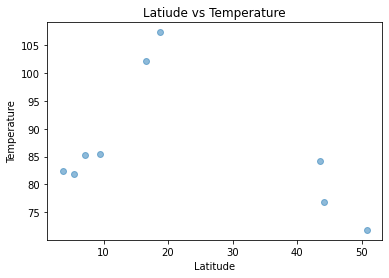

In [139]:
plt.title("Latiude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.scatter(clean_data_df["Lat"], clean_data_df["Max Temp"], alpha = 0.5)

## Latitude vs. Humidity Plot

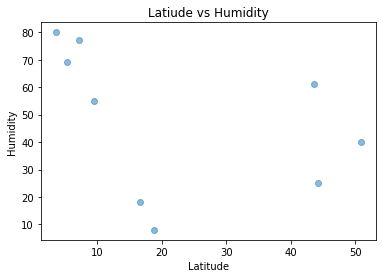

In [140]:
plt.title("Latiude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.scatter(clean_data_df["Lat"], clean_data_df["Humidity"], alpha = 0.5)

## Latitude vs. Cloudiness Plot

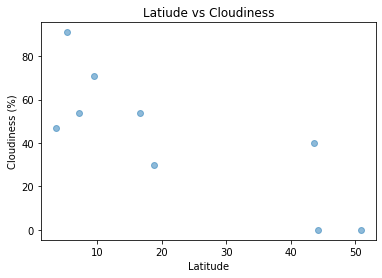

In [141]:
plt.title("Latiude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(clean_data_df["Lat"], clean_data_df["Cloudiness"], alpha = 0.5)

## Latitude vs. Wind Speed Plot

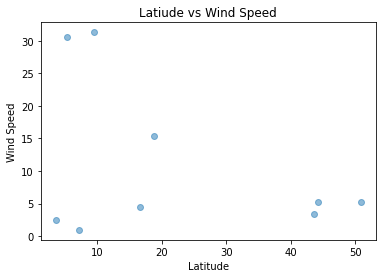

In [142]:
plt.title("Latiude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.scatter(clean_data_df["Lat"], clean_data_df["Wind Speed"], alpha = 0.5)

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression